In [2]:
#importing packages
import pandas as pd  
import numpy as np  

In [3]:
#Reading csv file
df = pd.read_csv("news.csv")  


In [4]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [6]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [7]:
df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [8]:
df.nunique()

Unnamed: 0    6335
title         6256
text          6060
label            2
dtype: int64

In [9]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [10]:
df['label'].value_counts

<bound method IndexOpsMixin.value_counts of 0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object>

In [11]:
df.shape

(6335, 4)

In [12]:
#text messages
df['text'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object>

In [13]:
#NUmber of unique messages
number_msgs=len(df['text'].unique())
print("Number of news samples in dataset:",number_msgs)

Number of news samples in dataset: 6060


PRE-PROCESSING DATA

In [14]:
#checking null values in dataset
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [15]:
#changing the column names
df.columns=['Index','Title','Text','Label']

In [16]:
#dropping NaN values
df.dropna()

,Index,Title,Text,Label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [17]:
#dropping index field
df.drop('Index',axis=1,inplace=True)

In [18]:
#dropping title field
df.drop('Title',axis=1,inplace=True)

In [19]:
df.columns

Index(['Text', 'Label'], dtype='object')

In [20]:
df['Text']

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: Text, Length: 6335, dtype: object

PRE PROCESS THE TEXT FIELD

In [21]:
#converting text to lower case
df['Text']=df['Text'].str.lower()

In [22]:
df.head()

,Text,Label
0,"daniel greenfield, a shillman journalism fello...",FAKE
1,google pinterest digg linkedin reddit stumbleu...,FAKE
2,u.s. secretary of state john f. kerry said mon...,REAL
3,"— kaydee king (@kaydeeking) november 9, 2016 t...",FAKE
4,it's primary day in new york and front-runners...,REAL


In [23]:
#removing hyperlinks from the text
df['Text']=df['Text'].str.replace(r'https\S+','',regex=True)
df.head()

,Text,Label
0,"daniel greenfield, a shillman journalism fello...",FAKE
1,google pinterest digg linkedin reddit stumbleu...,FAKE
2,u.s. secretary of state john f. kerry said mon...,REAL
3,"— kaydee king (@kaydeeking) november 9, 2016 t...",FAKE
4,it's primary day in new york and front-runners...,REAL


In [24]:
#removing special characters from Text field.
df['Text']=df['Text'].str.replace('[^A-Za-z\s]+', '',regex=True)
df.head()

,Text,Label
0,daniel greenfield a shillman journalism fellow...,FAKE
1,google pinterest digg linkedin reddit stumbleu...,FAKE
2,us secretary of state john f kerry said monday...,REAL
3,kaydee king kaydeeking november the lesson ...,FAKE
4,its primary day in new york and frontrunners h...,REAL


In [25]:
#importing nltk and stopwords
import nltk
from nltk.corpus import stopwords

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\boyin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
sw=stopwords.words('english')

In [28]:
#removing stopwords from text
df['Text']=df['Text'].apply(lambda words:' '.join(word.lower() for word in words.split() if word not in sw))

In [29]:
df.head()

,Text,Label
0,daniel greenfield shillman journalism fellow f...,FAKE
1,google pinterest digg linkedin reddit stumbleu...,FAKE
2,us secretary state john f kerry said monday st...,REAL
3,kaydee king kaydeeking november lesson tonight...,FAKE
4,primary day new york frontrunners hillary clin...,REAL


In [30]:
#forming tokens using lemmatization
t=nltk.tokenize.WhitespaceTokenizer()
l=nltk.stem.WordNetLemmatizer()
def lt(text):
    return [l.lemmatize(w) for w in t.tokenize(text)]
df['Tokens']=df['Text'].apply(lt)

In [31]:
df.head()

,Text,Label,Tokens
0,daniel greenfield shillman journalism fellow f...,FAKE,"[daniel, greenfield, shillman, journalism, fel..."
1,google pinterest digg linkedin reddit stumbleu...,FAKE,"[google, pinterest, digg, linkedin, reddit, st..."
2,us secretary state john f kerry said monday st...,REAL,"[u, secretary, state, john, f, kerry, said, mo..."
3,kaydee king kaydeeking november lesson tonight...,FAKE,"[kaydee, king, kaydeeking, november, lesson, t..."
4,primary day new york frontrunners hillary clin...,REAL,"[primary, day, new, york, frontrunners, hillar..."


In [32]:
#finding tokens length
df['word_length']=df['Text'].str.split().str.len()

In [33]:
df.head()

,Text,Label,Tokens,word_length
0,daniel greenfield shillman journalism fellow f...,FAKE,"[daniel, greenfield, shillman, journalism, fel...",679
1,google pinterest digg linkedin reddit stumbleu...,FAKE,"[google, pinterest, digg, linkedin, reddit, st...",235
2,us secretary state john f kerry said monday st...,REAL,"[u, secretary, state, john, f, kerry, said, mo...",242
3,kaydee king kaydeeking november lesson tonight...,FAKE,"[kaydee, king, kaydeeking, november, lesson, t...",237
4,primary day new york frontrunners hillary clin...,REAL,"[primary, day, new, york, frontrunners, hillar...",181


In [34]:
#removing duplicate values
df.drop_duplicates(subset='Text',inplace=True)

In [35]:
df.shape

(6046, 4)

In [36]:
df.head()

,Text,Label,Tokens,word_length
0,daniel greenfield shillman journalism fellow f...,FAKE,"[daniel, greenfield, shillman, journalism, fel...",679
1,google pinterest digg linkedin reddit stumbleu...,FAKE,"[google, pinterest, digg, linkedin, reddit, st...",235
2,us secretary state john f kerry said monday st...,REAL,"[u, secretary, state, john, f, kerry, said, mo...",242
3,kaydee king kaydeeking november lesson tonight...,FAKE,"[kaydee, king, kaydeeking, november, lesson, t...",237
4,primary day new york frontrunners hillary clin...,REAL,"[primary, day, new, york, frontrunners, hillar...",181


VISUALIZATION

In [37]:
#number of real and fake news
df['Label'].value_counts()

FAKE    3057
REAL    2989
Name: Label, dtype: int64

<AxesSubplot:>

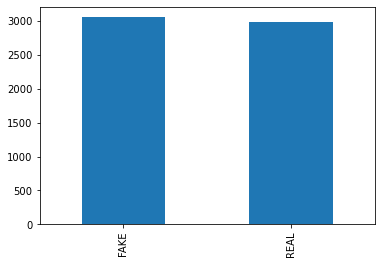

In [38]:
#bar chart shows true and fake samples
df['Label'].value_counts().plot.bar()

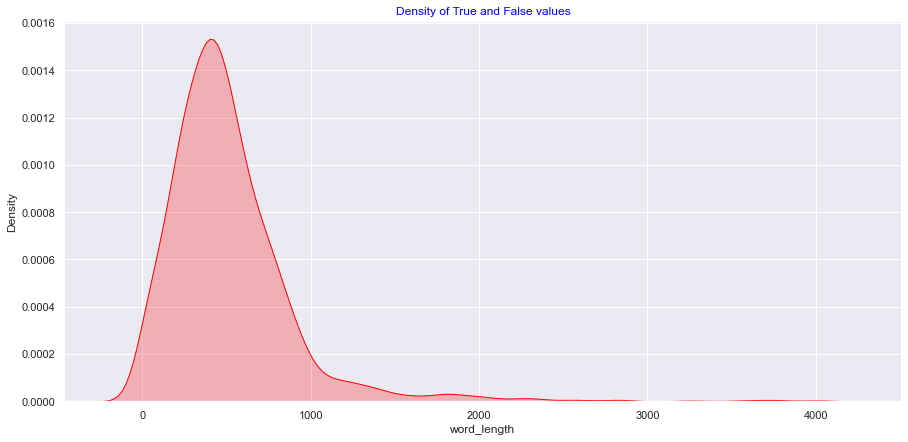

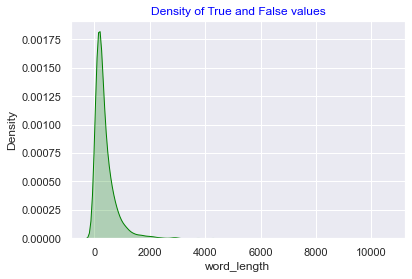

In [39]:
#density of true and fake news using word count
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
plt.figure(figsize=(15,7))
cmap=['red','green']
labels=['REAL','FAKE']
for label,clr in zip(labels,cmap):
    sns.kdeplot(df.loc[(df['Label']==label),'word_length'],color=clr,shade=True,label=label)
    plt.title("Density of True and False values",color="Blue")
    plt.show()

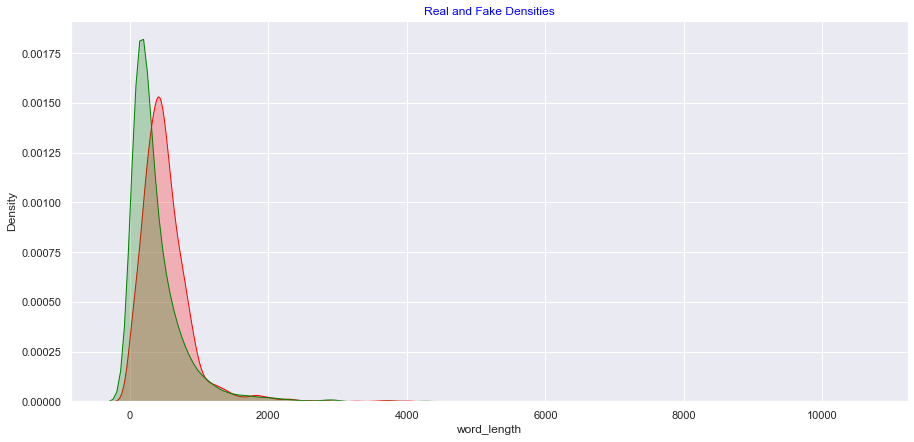

In [40]:
sns.set(color_codes=True)
plt.figure(figsize=(15,7))
cmap=['red','green']
labels=['REAL','FAKE']
for label,clr in zip(labels,cmap):
    sns.kdeplot(df.loc[(df['Label']==label),'word_length'],color=clr,shade=True,label=label)
    plt.title("Real and Fake Densities",color="Blue")

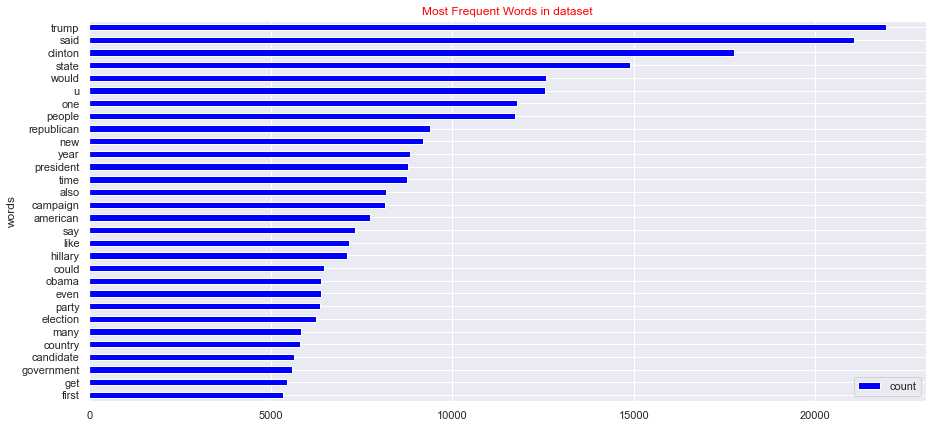

In [41]:
#displaying most frequent words in dataset
import itertools
import collections
import pandas as pd
lt=list(df['Tokens'])
t=list(itertools.chain(*lt))
c=collections.Counter(t)
d=pd.DataFrame(c.most_common(30),columns=['words','count'])
fig,ax=plt.subplots(figsize=(15,7))
d.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color='blue')
plt.title("Most Frequent Words in dataset",color="Red")
plt.show()

SPLITTING THE DATA

In [42]:
x=df.iloc[:,0].values
y=df.iloc[:,1].values

In [43]:
print(x)

['daniel greenfield shillman journalism fellow freedom center new york writer focusing radical islam final stretch election hillary rodham clinton gone war fbi word unprecedented thrown around often election ought retired still unprecedented nominee major political party go war fbi thats exactly hillary people done coma patients waking watching hour cnn hospital beds would assume fbi director james comey hillarys opponent election fbi attack everyone obama cnn hillarys people circulated letter attacking comey currently media hit pieces lambasting targeting trump wouldnt surprising clintons allies start running attack ads fbi fbis leadership warned entire leftwing establishment form lynch mob continue going hillary fbis credibility attacked media democrats preemptively head results investigation clinton foundation hillary clinton covert struggle fbi agents obamas doj people gone explosively public new york times compared comey j edgar hoover bizarre headline james comey role recalls hoo

In [44]:
print(y)

['FAKE' 'FAKE' 'REAL' ... 'FAKE' 'REAL' 'REAL']


LOGISTIC REGRESSION MODEL

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=23)

Text to Numerics

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer 
  
vectorization = TfidfVectorizer() 
x_train = vectorization.fit_transform(x_train) 
x_test = vectorization.transform(x_test)

In [48]:
print(x_train)

  (0, 46779)	0.1765119970336506
  (0, 10081)	0.23793781423864435
  (0, 23575)	0.15854794447636172
  (0, 65824)	0.21443503540506417
  (0, 65810)	0.1477182745395601
  (0, 66452)	0.14910425436196884
  (0, 24305)	0.18735711365180693
  (0, 71237)	0.1287011231039346
  (0, 72538)	0.30810503260665983
  (0, 50894)	0.38972419788954665
  (0, 70208)	0.27947166651154326
  (0, 1246)	0.1536641198208433
  (0, 15626)	0.14259028721981087
  (0, 73125)	0.1725124766779204
  (0, 6259)	0.36034386831597126
  (0, 37706)	0.4657454865402276
  (1, 70529)	0.03023746246486645
  (1, 20493)	0.05572428646314519
  (1, 33829)	0.07436739772801348
  (1, 43552)	0.0222836638178696
  (1, 61571)	0.07647475299882103
  (1, 51869)	0.04435403435340545
  (1, 729)	0.03232277818236718
  (1, 53401)	0.03468674784590362
  (1, 49974)	0.02661649394592063
  :	:
  (4835, 36533)	0.012599367280301373
  (4835, 48330)	0.03917931614515292
  (4835, 4051)	0.026553923024109347
  (4835, 67721)	0.027769852760547248
  (4835, 40838)	0.0151061435129445

In [49]:
print(x_test)

  (0, 73654)	0.02334761601433896
  (0, 73653)	0.03293592750129156
  (0, 73554)	0.018268472122348566
  (0, 73108)	0.023747679261358182
  (0, 72987)	0.0218261599996926
  (0, 72897)	0.015970485922994597
  (0, 72885)	0.04620782209339435
  (0, 72860)	0.026811769399853254
  (0, 72840)	0.022696734666024825
  (0, 72640)	0.035668671294302234
  (0, 72635)	0.04654406268120755
  (0, 72576)	0.11748221875227681
  (0, 72437)	0.019821341861065368
  (0, 72327)	0.027821950437343937
  (0, 72138)	0.01658710860103119
  (0, 72076)	0.017357738008380082
  (0, 71745)	0.03635403302029171
  (0, 71701)	0.02073910123436421
  (0, 71690)	0.05123397419523284
  (0, 71676)	0.02205302310329769
  (0, 71529)	0.01428883888355719
  (0, 71476)	0.03999039986967222
  (0, 71348)	0.0334233842570145
  (0, 71338)	0.03784190474095903
  (0, 71321)	0.027744920906946607
  :	:
  (1209, 13887)	0.06261679273391828
  (1209, 13514)	0.07575585514833041
  (1209, 13510)	0.11346644321200482
  (1209, 11718)	0.08140723469666765
  (1209, 11671)	0

In [50]:
reg=LogisticRegression()
#Fitting Logistic Regression model
model1=reg.fit(x_train, y_train) 
y_pred=model1.predict(x_test)

Accuracy of Logistic Regression

In [51]:
import sklearn.metrics
accuracy=sklearn.metrics.accuracy_score(y_test,y_pred)
print(accuracy)

0.9247933884297521


In [52]:
print("Accuracy of trained data:")
print(accuracy_score(y_train, model1.predict(x_train))) 
print("Accuracy of test data:")
print(accuracy_score(y_test, model1.predict(x_test))) 

Accuracy of trained data:
0.9520264681555004
Accuracy of test data:
0.9247933884297521


In [53]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
cm

array([[572,  35],
       [ 56, 547]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

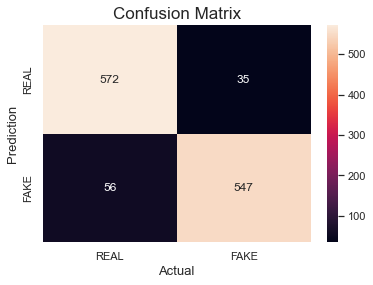

In [54]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['REAL','FAKE'],
            yticklabels=['REAL','FAKE'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show

DECISION TREE MODEL

In [55]:
#importing decision tree function
from sklearn.tree import DecisionTreeClassifier 
  
dt = DecisionTreeClassifier() 
model2=dt.fit(x_train, y_train) 
y_pred=model2.predict(x_test)


In [56]:
#accuracy of decision tree model
import sklearn.metrics
accuracy2=sklearn.metrics.accuracy_score(y_test,y_pred)
print("Accuracy of Decision tree model:",accuracy2)

Accuracy of Decision tree model: 0.8


In [57]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
cm

array([[483, 124],
       [118, 485]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

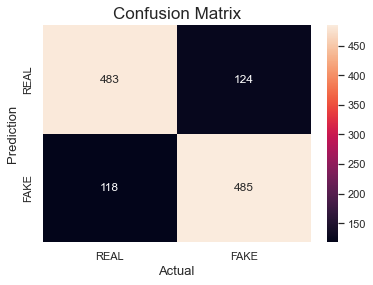

In [58]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['REAL','FAKE'],
            yticklabels=['REAL','FAKE'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show

RANDOM FOREST ALGORITHM

In [59]:
#importing random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100, random_state=42)
model3=rf.fit(x_train,y_train)
y_pred=model3.predict(x_test)

In [60]:
accuracy3=sklearn.metrics.accuracy_score(y_test,y_pred)
print("Accuracy of Random Forest Classifier is:",accuracy3)

Accuracy of Random Forest Classifier is: 0.8900826446280992


In [61]:
print("Accuracy of trained data:")
print(accuracy_score(y_train, model3.predict(x_train))) 
print("Accuracy of test data:")
print(accuracy_score(y_test, model3.predict(x_test))) 

Accuracy of trained data:
1.0
Accuracy of test data:
0.8900826446280992


In [62]:
#classification report 
from sklearn.metrics import accuracy_score, classification_report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report: ",)
print(classification_rep)

Classification Report: 
              precision    recall  f1-score   support

        FAKE       0.90      0.88      0.89       607
        REAL       0.89      0.90      0.89       603

    accuracy                           0.89      1210
   macro avg       0.89      0.89      0.89      1210
weighted avg       0.89      0.89      0.89      1210



In [63]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
cm

array([[537,  70],
       [ 63, 540]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

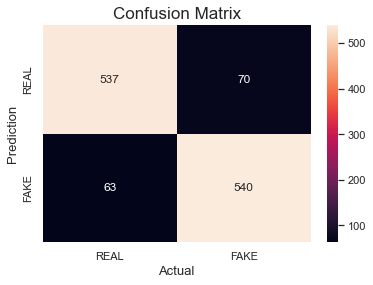

In [64]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['REAL','FAKE'],
            yticklabels=['REAL','FAKE'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show

PassiveAggressiveClassifier

In [65]:
#importing packages
from sklearn.linear_model import PassiveAggressiveClassifier

In [66]:
#fitting the model
pac=PassiveAggressiveClassifier(max_iter=50)
model4=pac.fit(x_train,y_train)
y_pred=model4.predict(x_test)

In [67]:
#caluculating accuracy
accuracy4=accuracy_score(y_test,y_pred)
print("Accuracy of PassiveAggressiveClassifier model:",accuracy4)

Accuracy of PassiveAggressiveClassifier model: 0.9396694214876034


In [68]:
#confusion matrix 
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[568  39]
 [ 34 569]]


<function matplotlib.pyplot.show(close=None, block=None)>

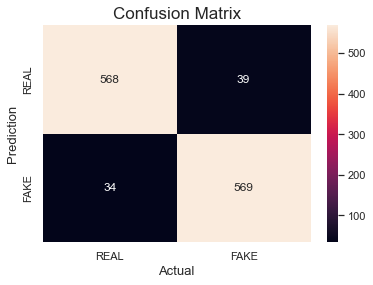

In [69]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['REAL','FAKE'],
            yticklabels=['REAL','FAKE'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show